In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/agile_octopus_london.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,9/29/22 4:30,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,38.38,36.55
1,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,37.80,36.00
2,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,54.85,52.24
3,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,48.38,46.08
4,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,9/29/22 8:00,55.00,52.38


In [3]:
len(half_hourly_prices)

31207

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_2619/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


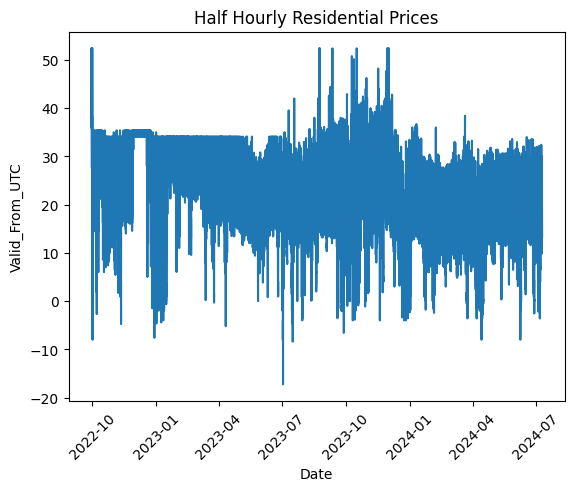

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


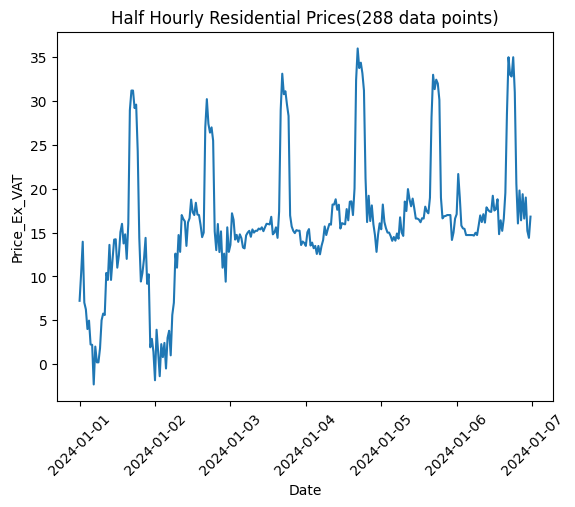

In [6]:
start_date = '2024-01-01'
end_date = '2024-01-07'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Half Hourly Residential Prices({num_data_points} data points)')
plt.xticks(rotation=45)
plt.show()

## One Week of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/transformers/generation/logits_process.py:156: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  eos_token_mask = torch.isin(vocab_tensor, eos_token_id)


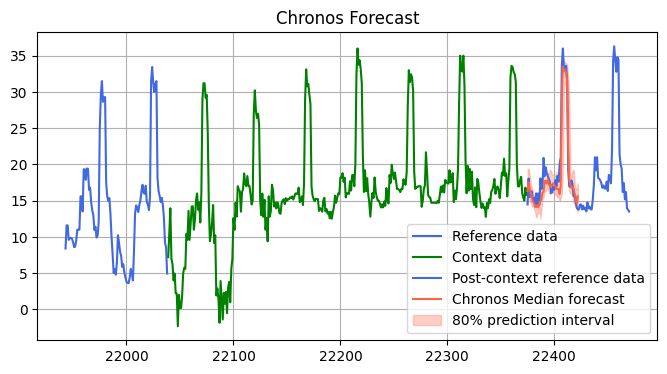

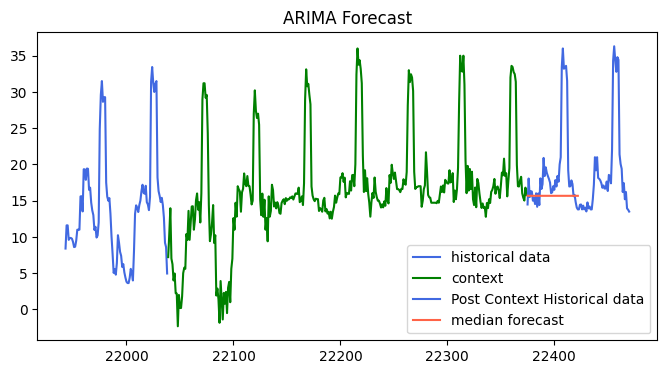

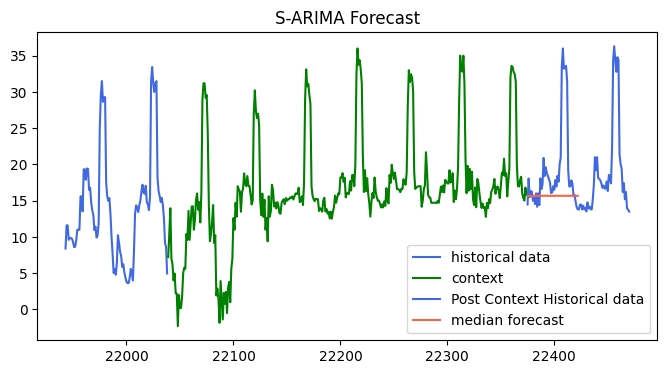

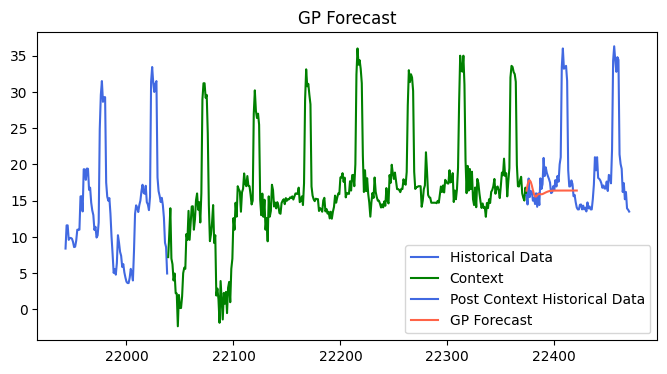

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


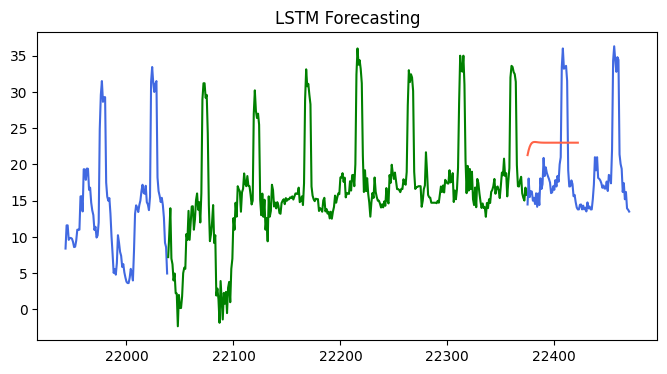


Results comparison for Price_Ex_VAT:

MSE
- chronos_mini MSE: 2.888406760829741
- arima MSE: 44.15473405320429
- sarima MSE: 44.15473405320429
- gp MSE: 40.241242055653515
- lstm MSE: 48.66109386253422
NMSE
- chronos_mini NMSE: 0.0868398530053278
- arima NMSE: 1.327510607809308
- sarima NMSE: 1.327510607809308
- gp NMSE: 1.209851601323944
- lstm NMSE: 1.462994165297905



In [7]:
start_date = '2024-01-01'
end_date = '2024-01-08'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

## Two Weeks of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


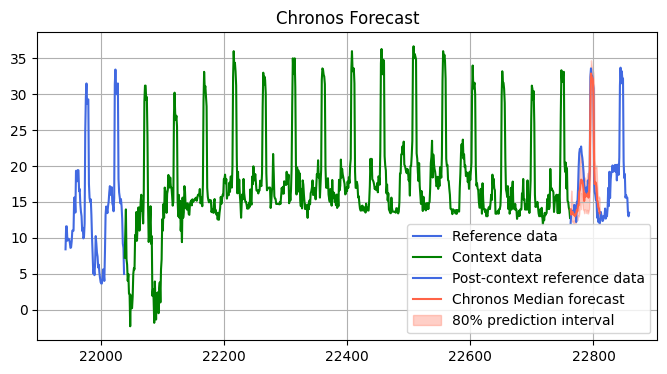

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


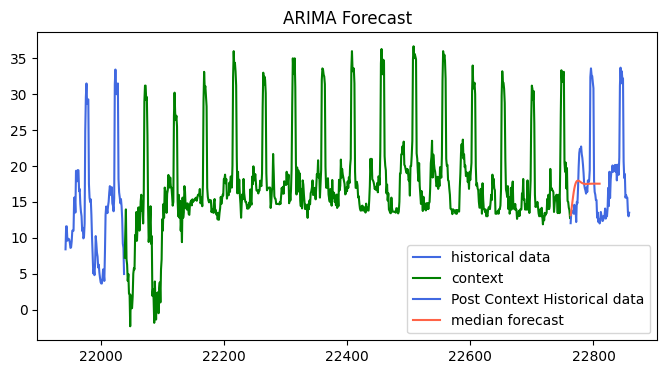

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


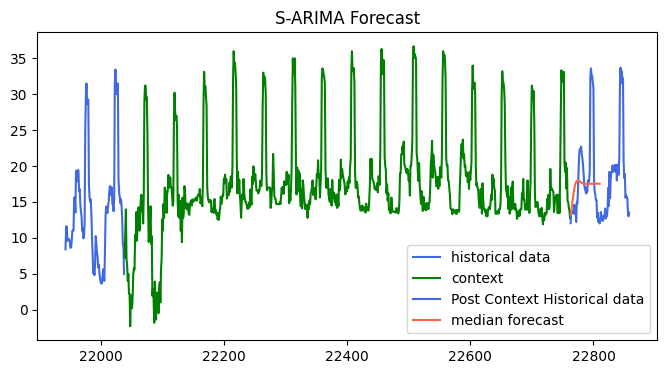

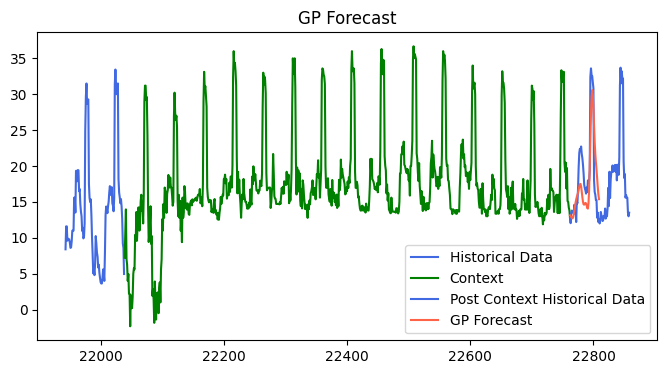

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


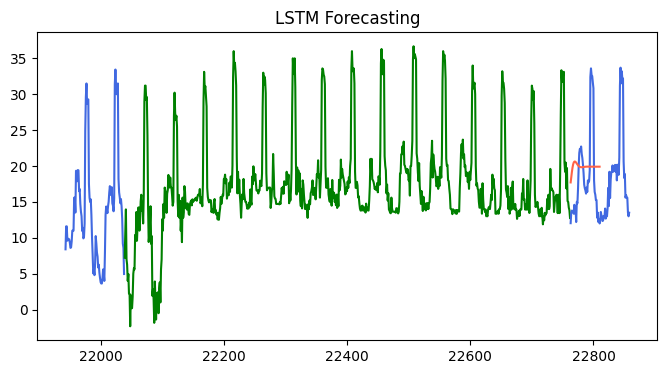


Results comparison for Price_Ex_VAT:

MSE
- chronos_mini MSE: 5.432819891272206
- arima MSE: 34.85390561812266
- sarima MSE: 34.85390561812266
- gp MSE: 20.858565755117365
- lstm MSE: 38.47408340600598
NMSE
- chronos_mini NMSE: 0.15001545316331868
- arima NMSE: 0.9624144643951782
- sarima NMSE: 0.9624144643951782
- gp NMSE: 0.5759637272565773
- lstm NMSE: 1.0623777656365017



In [8]:
start_date = '2024-01-01'
end_date = '2024-01-16'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

# Three Weeks of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


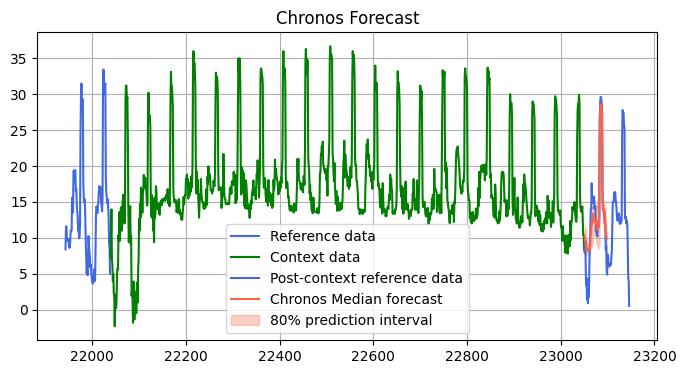

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


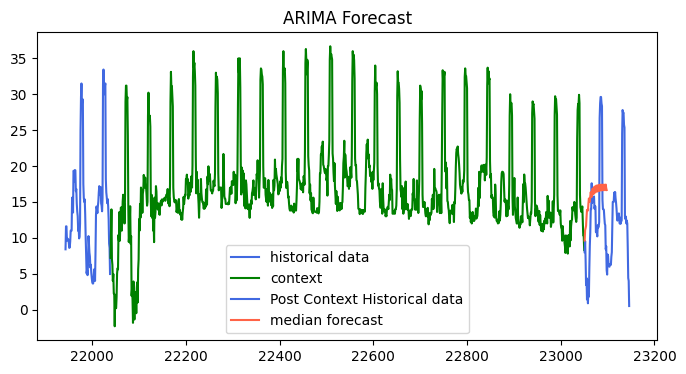

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


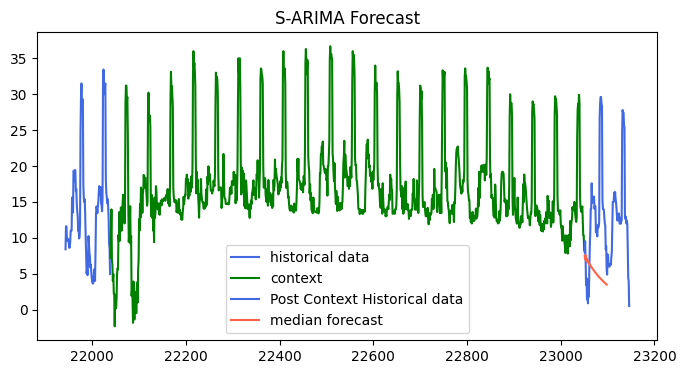

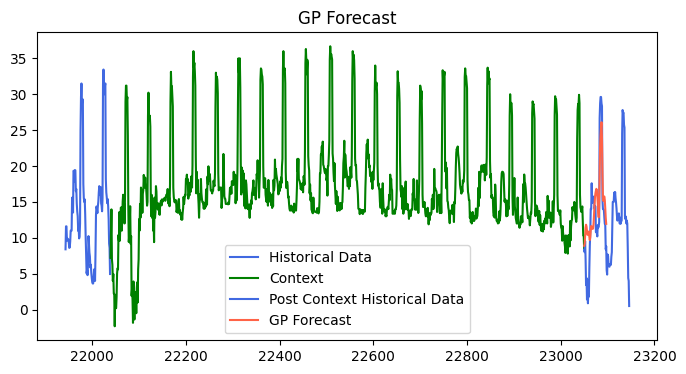

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


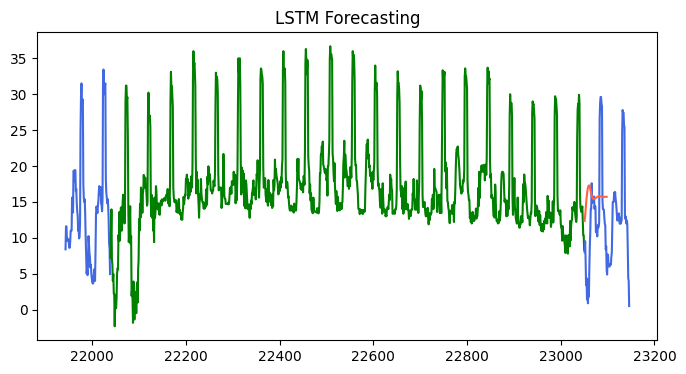


Results comparison for Price_Ex_VAT:

MSE
- chronos_mini MSE: 8.634566651240148
- arima MSE: 52.69045840312504
- sarima MSE: 119.64103576667547
- gp MSE: 29.187699707658453
- lstm MSE: 63.78704623717773
NMSE
- chronos_mini NMSE: 0.1624085826310329
- arima NMSE: 0.9910610471924347
- sarima NMSE: 2.2503423539597924
- gp NMSE: 0.548994886628177
- lstm NMSE: 1.1997780766579982



In [9]:
start_date = '2024-01-01'
end_date = '2024-01-22'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

# One Month of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


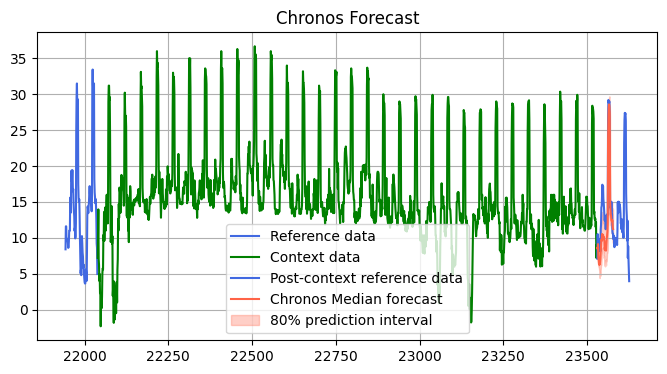

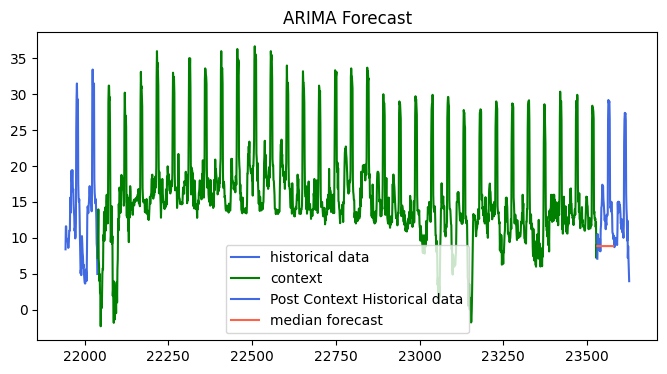

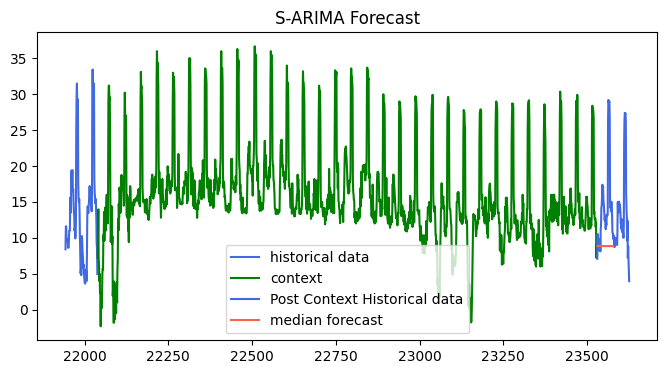

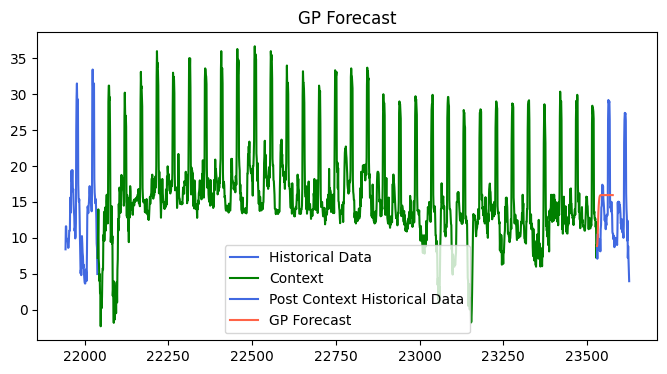

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


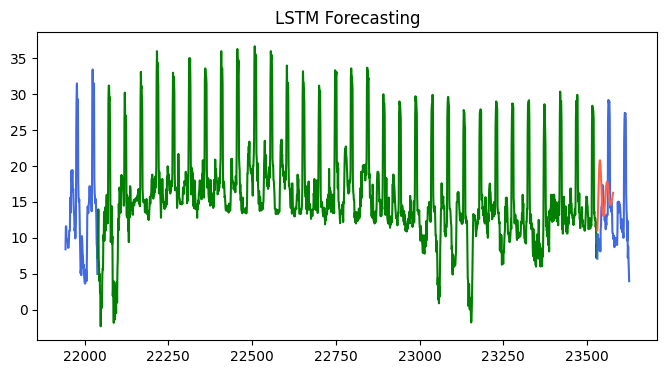


Results comparison for Price_Ex_VAT:

MSE
- chronos_mini MSE: 9.910906278213762
- arima MSE: 63.194192159215696
- sarima MSE: 63.194192159215696
- gp MSE: 30.23338813931413
- lstm MSE: 45.310204538237286
NMSE
- chronos_mini NMSE: 0.29943822196284825
- arima NMSE: 1.9092861951616145
- sarima NMSE: 1.9092861951616145
- gp NMSE: 0.9134413881250536
- lstm NMSE: 1.3689572580791303



In [10]:
start_date = '2024-01-01'
end_date = '2024-02-01'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)